<a href="https://colab.research.google.com/github/Jaan19867/ML-Project/blob/master/checking_weights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow

In [ ]:
pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 8.4 MB/s eta 0:00:00


In [ ]:
pip install tensorflow-hub

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import numpy as np

# Load the Vision Transformer model from TensorFlow Hub
model_url = "https://tfhub.dev/sayakpaul/vit_b16_fe/1"  # Pretrained ViT model
model = tf.keras.Sequential([hub.KerasLayer(model_url)])

# Check model summary
model.build([None, 224, 224, 3])
model.summary()

# Load and preprocess an image
img_path = '/content/real.jpg'  # Replace with your image path
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Pass the image through the model
predictions = model.predict(img_array)

# Check if weights are not all zeros
layer = model.layers[0]  # Adjust the layer index if needed
weights = layer.weights[0].numpy()

non_zero_weights = np.count_nonzero(weights)

if non_zero_weights > 0:
    print("Weights are loaded correctly and are not all zeros.")
else:
    print("Weights are all zeros.")

# Optionally, print the weights of the first layer for inspection
print(weights)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 768)               85798656  
                                                                 
Total params: 85798656 (327.30 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 85798656 (327.30 MB)
_________________________________________________________________
1/1 [==============================] - 8s 8s/step
Weights are loaded correctly and are not all zeros.
[ 2.05689326e-01  1.59051731e-01  3.81507725e-02 -3.46671671e-01
 -5.66950202e-01  4.17287946e-01 -1.48567811e-01 -1.90976769e-01
  6.98010027e-01  2.51308799e-01 -5.04759327e-02  7.30848372e-01
 -7.11070448e-02  3.52536827e-01 -1.45308394e-02 -3.63583952e-01
 -4.25117821e-01  1.61207333e-01 -9.72760320e-02  2.63418406e-01
  1.83491800e-02  2.67188340e-01 -1.92262232e-01 -2.00817119e-02
 -1.93655267e-01  4.06584620e-01  1.10799670e-01

# The URL https://tfhub.dev/sayakpaul/vit_b16_fe/1 points to a TensorFlow Hub module for a Vision Transformer (ViT) model, specifically a ViT-B/16 model that has been fine-tuned for feature extraction (hence the "fe" in the URL). This model is created by Sayak Paul and is hosted on TensorFlow Hub, a repository for reusable machine learning models.

In [ ]:
pip install tensorflow tensorflow_hub opencv-python-headless numpy

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub

# Function to perform DCT
def perform_dct(image_path):
    # Load the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image at {image_path} could not be loaded.")
    # Resize the image to 224x224 (size expected by ViT model)
    img = cv2.resize(img, (224, 224))
    # Perform DCT
    dct_img = cv2.dct(np.float32(img))
    # Normalize the DCT image to the range [0, 1]
    dct_img = cv2.normalize(dct_img, None, 0, 1, cv2.NORM_MINMAX)
    # Convert to 3-channel RGB image
    dct_img = cv2.merge([dct_img, dct_img, dct_img])
    return dct_img

# Paths to your real and fake images
real_image_path = '/content/real.jpg'
fake_image_path = '/content/fake.jpg'

# Perform DCT on both images
real_dct_img = perform_dct(real_image_path)
fake_dct_img = perform_dct(fake_image_path)


In [ ]:
# Load the Vision Transformer model from TensorFlow Hub
model_url = "https://tfhub.dev/sayakpaul/vit_b16_fe/1"
vit_model = tf.keras.Sequential([hub.KerasLayer(model_url)])
vit_model.build([None, 224, 224, 3])
vit_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 768)               85798656  
                                                                 
Total params: 85798656 (327.30 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 85798656 (327.30 MB)
_________________________________________________________________


In [ ]:
# Function to preprocess image for ViT
def preprocess_image(img):
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = tf.convert_to_tensor(img, dtype=tf.float32)
    return img

# Preprocess images
real_dct_img_preprocessed = preprocess_image(real_dct_img)
fake_dct_img_preprocessed = preprocess_image(fake_dct_img)

# Extract features using ViT model
real_features = vit_model(real_dct_img_preprocessed)
fake_features = vit_model(fake_dct_img_preprocessed)

# Print the extracted features
print("Real Image Features:", real_features.numpy())
print("Fake Image Features:", fake_features.numpy())


Real Image Features: [[-6.64094031e-01  1.52433828e-01 -1.55493081e+00 -1.16011047e+00
  -3.16083050e+00 -1.87765837e+00 -1.85866368e+00 -8.44485998e-01
  -4.76614833e-01  4.53914762e-01  9.72361326e-01  1.11010242e+00
  -7.45826215e-02 -6.90225303e-01  1.79415986e-01  3.85180376e-02
   2.75888538e+00  1.36081123e+00 -3.00874468e-02 -1.42828181e-01
   4.39695269e-01  4.18514013e-01  5.40817320e-01 -4.44729835e-01
  -4.05734666e-02  2.56309319e+00 -9.00508106e-01  4.82452750e-01
  -7.10825253e+00 -3.02108526e-01  1.07777572e+00 -3.56189758e-01
  -1.29218531e+00 -3.15139532e-01 -1.60449862e+00 -1.65801263e+00
   1.99414420e+00 -8.00160170e-01  1.48314381e+00  7.31631756e-01
   8.99529099e-01  9.62944925e-01  1.40131283e+00  6.88295424e-01
  -1.24508984e-01  8.28906536e-01 -2.38129437e-01 -3.26087445e-01
   3.45723391e-01  7.10100532e-01 -1.03506017e+00  3.88013542e-01
  -6.46789968e-01 -5.49183369e-01 -4.20135051e-01 -8.41697633e-01
  -7.28154123e-01  1.33141422e+00  1.46174297e-01 -6.34

In [ ]:
pip install tensorflow tensorflow_hub opencv-python-headless numpy matplotlib

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 768)               85798656  
                                                                 
Total params: 85798656 (327.30 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 85798656 (327.30 MB)
_________________________________________________________________


Real Image Features: [[-6.64094031e-01  1.52433828e-01 -1.55493081e+00 -1.16011047e+00
  -3.16083050e+00 -1.87765837e+00 -1.85866368e+00 -8.44485998e-01
  -4.76614833e-01  4.53914762e-01  9.72361326e-01  1.11010242e+00
  -7.45826215e-02 -6.90225303e-01  1.79415986e-01  3.85180376e-02
   2.75888538e+00  1.36081123e+00 -3.00874468e-02 -1.42828181e-01
   4.39695269e-01  4.18514013e-01  5.40817320e-01 -4.44729835e-01
  -4.05734666e-02  2.56309319e+00 -9.00508106e-01  4.82452750e-01
  -7.10825253e+00 -3.02108526e-01  1.07777572e+00 -3.56189758e-01
  -1.29218531e+00 -3.15139532e-01 -1.60449862e+00 -1.65801263e+00
   1.99414420e+00 -8.00160170e-01  1.48314381e+00  7.31631756e-01
   8.99529099e-01  9.62944925e-01  1.40131283e+00  6.88295424e-01
  -1.24508984e-01  8.28906536e-01 -2.38129437e-01 -3.26087445e-01
   3.45723391e-01  7.10100532e-01 -1.03506017e+00  3.88013542e-01
  -6.46789968e-01 -5.49183369e-01 -4.20135051e-01 -8.41697633e-01
  -7.28154123e-01  1.33141422e+00  1.46174297e-01 -6.34

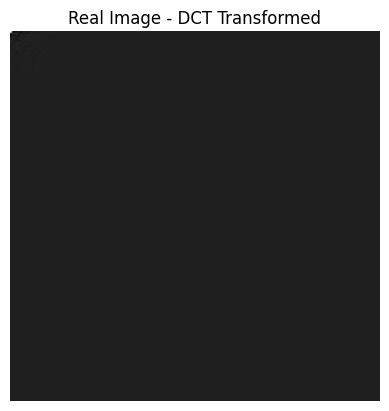

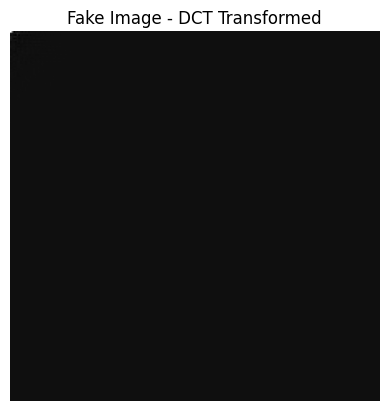

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt

# Function to perform DCT
def perform_dct(image_path):
    # Load the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image at {image_path} could not be loaded.")
    # Resize the image to 224x224 (size expected by ViT model)
    img = cv2.resize(img, (224, 224))
    # Perform DCT
    dct_img = cv2.dct(np.float32(img))
    # Normalize the DCT image to the range [0, 1]
    dct_img = cv2.normalize(dct_img, None, 0, 1, cv2.NORM_MINMAX)
    # Convert to 3-channel RGB image
    dct_img = cv2.merge([dct_img, dct_img, dct_img])
    return dct_img

# Paths to your real and fake images
real_image_path = '/content/real.jpg'
fake_image_path = '/content/fake.jpg'

# Perform DCT on both images
real_dct_img = perform_dct(real_image_path)
fake_dct_img = perform_dct(fake_image_path)

# Load the Vision Transformer model from TensorFlow Hub
model_url = "https://tfhub.dev/sayakpaul/vit_b16_fe/1"
vit_model = tf.keras.Sequential([hub.KerasLayer(model_url)])
vit_model.build([None, 224, 224, 3])
vit_model.summary()

# Function to preprocess image for ViT
def preprocess_image(img):
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = tf.convert_to_tensor(img, dtype=tf.float32)
    return img

# Preprocess images
real_dct_img_preprocessed = preprocess_image(real_dct_img)
fake_dct_img_preprocessed = preprocess_image(fake_dct_img)

# Extract features using ViT model
real_features = vit_model(real_dct_img_preprocessed)
fake_features = vit_model(fake_dct_img_preprocessed)

# Print the extracted features
print("Real Image Features:", real_features.numpy())
print("Fake Image Features:", fake_features.numpy())

# Function to display images
def display_image(img, title):
    plt.figure()
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Display the DCT images
display_image(real_dct_img, 'Real Image - DCT Transformed')
display_image(fake_dct_img, 'Fake Image - DCT Transformed')
